In [1]:
import model

Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("rpn_cls_score/Reshape:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_5:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from /home/tutu/changhong/ocr/chinese-ocr/ctpn/checkpoints/model_final_tf13.ckpt


Using TensorFlow backend.


In [2]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
paths = glob('./test/*.*')
paths

['./test/IMG_1563.JPG',
 './test/CgQgIlljJlyAF3fGAABk3TG5RM4164.jpg',
 './test/test.png',
 './test/demo-card-1.jpeg',
 './test/3bef1970fd6e4601a292d7b272128512.jpeg',
 './test/WechatIMG305.jpeg',
 './test/4.jpg',
 './test/CgQgIll5TaGADkiiAAFhxGXefcA951.jpg']

## pytorch crnn

图像的文字朝向为:270度
识别结果:

产品名称:个体营养分析仪-型号:NQA-Pplus
220V频率:50Hz输入功率:95W
,输入电源:
安全类别:I类BF型
产产品注册编号:晋械注准20152210006
出厂编号:NA021602001B
生产日期:2016年02月25日
委托方/注册人:山西四海华辰科技有限公司
住所:太原高新区产业路48号新岛科技园C座208室
联系方式:0351-7037508
村科技园区大兴生物
医药产业基地天华大街33号院1号楼
生产许可证编号:京食药监械生产许可20140021号
-
其他内容详见说明书


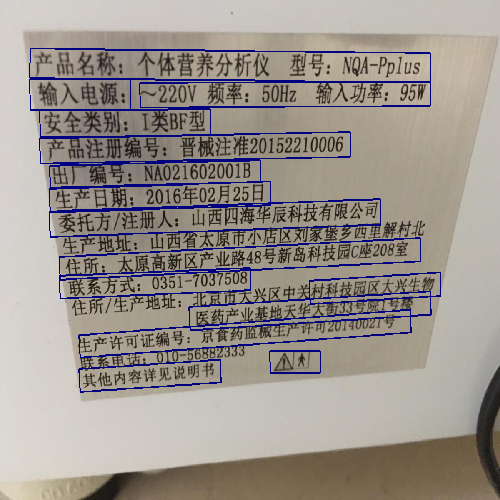

In [58]:
im = Image.open(paths[4])
img = np.array(im.convert('RGB'))
#t = time.time()
result,img,angle = model.model(img,model='crnn', detectAngle=True) ## if model == crnn ,you should install pytorch
#print "It takes time:{}s".format(time.time()-t)
#print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"

for key in result:
    print result[key][1]
    
Image.fromarray(img).resize((500,500))

## keras crnn 

It takes time:1.62564110756s
---------------------------------------
图像的文字朝向为:270度
识别结果:

产品名称:个体营养分析仪号:NQA-FpIus
 -220V频率;50Hz。输入功率:957
输入电源:
安全类别:I类BF型
产品注册编号:晋械注准20152210006
出厂编号:NA021602001B
生产日期:2016年02月25日
委托方/注册人:山西四海华辰科技有限公司
住所:太原高新区产业路48号新岛科技局C座208室
联系方式:0351-7037508
村科技局区大兴生勘
医药产业基地天华大街33号院7号接
生产许可证编号:京食药监械生产许可20140021号
人山众
其他内容详见说明书


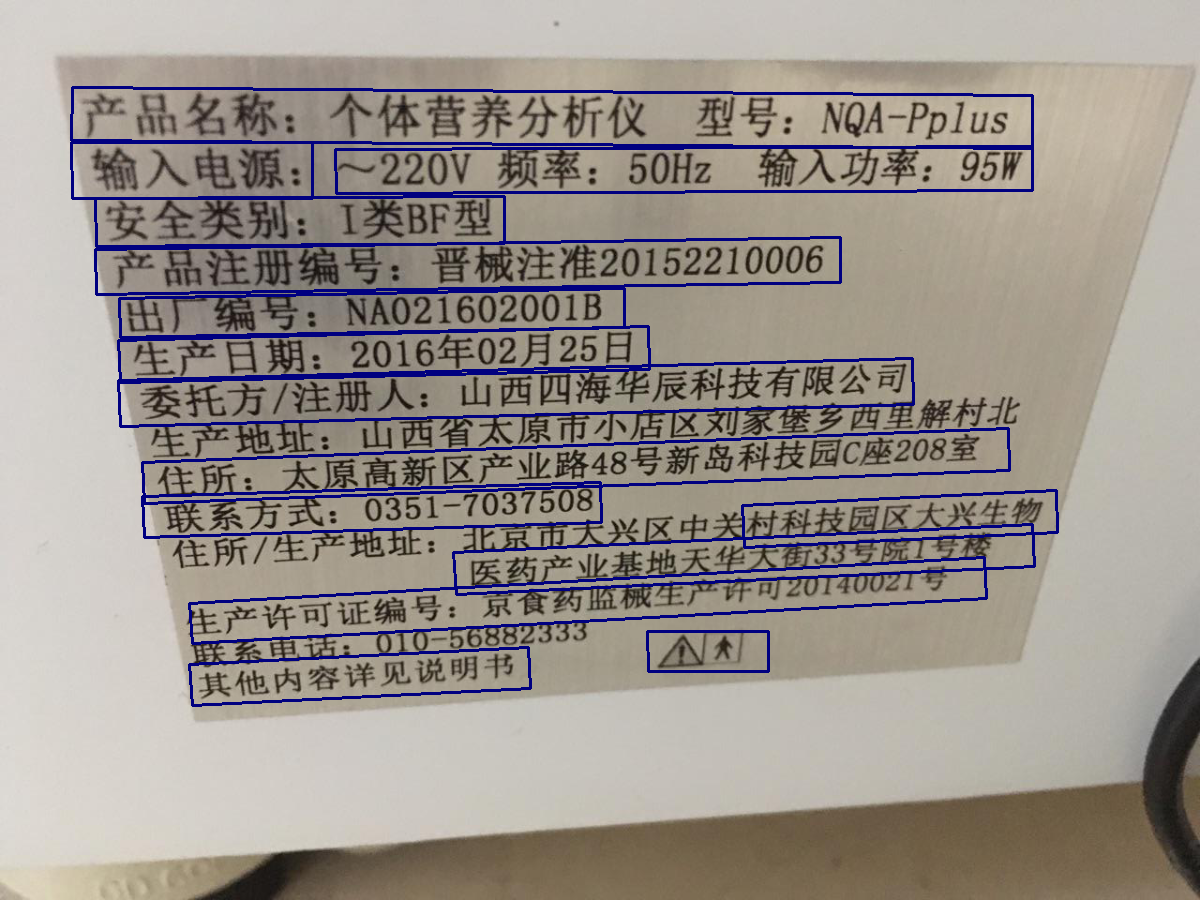

In [57]:
im = Image.open(paths[4])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='keras',detectAngle=True) ##if model == keras ,you should install keras
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"
for key in result:
    print result[key][1]
Image.fromarray(img)